In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from matrixprofile import *
from matrixprofile.discords import discords
import utils


C:\Users\Federico\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [2]:
#!pip install matrixprofile-ts


In [3]:
df = pd.read_csv('data/fma_metadata/ts_normal_Fede.csv',index_col=[0])

df

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,0.678479,0.583783,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,-0.856411,-0.172586,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,0.854607,1.257842,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,2.086341,1.679941,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,-0.708239,-1.260999,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,-1.459256,-1.172778,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,-0.250479,-0.323848,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,1.364934,2.620067,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [4]:
tracks = utils.load('data/fma_metadata/tracks.csv')
tracks=tracks[[('track','genre_top'),('artist','name')]]
tracks.columns = tracks.columns.droplevel(0)


In [5]:
tracks

,genre_top,name
track_id,,
2,Hip-Hop,AWOL
3,Hip-Hop,AWOL
5,Hip-Hop,AWOL
10,Pop,Kurt Vile
20,NaN,Nicky Cook
...,...,...
155316,Rock,Spowder
155317,Rock,Spowder
155318,Rock,Spowder


In [6]:
TS= pd.merge(tracks, df, left_index=True, right_index=True)
TS.info()
TS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3994 entries, 2 to 155066
Columns: 659 entries, genre_top to 656
dtypes: category(1), float64(657), object(1)
memory usage: 20.1+ MB


,genre_top,name,0,1,2,3,4,5,6,7,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
2,Hip-Hop,AWOL,-0.134461,1.091443,2.611349,2.097392,0.735365,0.544687,0.961243,0.489815,...,1.659076,0.728619,1.144180,1.641569,1.646186,1.155188,0.243829,-1.270410,-1.418964,-1.378548
5,Hip-Hop,AWOL,-0.915597,-0.890180,-1.271114,-1.254090,0.034274,0.782003,0.836597,-0.421936,...,0.986330,0.646999,0.348132,-0.214028,0.523669,0.599232,0.826596,1.141205,1.416961,1.107621
148,Experimental,Contradiction,-1.398620,-1.179364,-0.760749,-0.668556,-0.215774,-0.222921,-0.153197,0.265194,...,0.799620,0.773268,0.810048,0.704623,0.624920,0.619605,0.644483,0.689480,0.706873,0.508055
182,Rock,Ariel Pink's Haunted Graffiti,0.831877,0.867620,1.211251,1.300045,1.009059,0.776468,1.445092,1.928781,...,-0.231961,0.177564,0.976858,1.312150,0.890539,0.194135,0.318079,0.535572,0.486992,0.594535
255,Rock,Bird Names,-0.001086,-0.109745,-0.149553,-0.249814,-0.338598,-0.294437,-0.167429,-0.541922,...,-0.579852,-1.053090,-1.056643,-0.359074,0.243012,0.159436,-0.013340,-0.244169,-0.727907,-1.238562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154306,Hip-Hop,Fleslit,-1.110754,-1.006785,-0.815322,-0.789090,-0.743797,-0.657886,-0.834670,-1.228586,...,-0.597113,-1.080429,1.155361,1.460806,-0.275518,0.091648,0.024073,-0.617410,-1.290487,-1.266442
154307,Hip-Hop,Fleslit,-0.476355,-0.345470,0.423441,0.826796,0.759305,0.680591,0.419693,0.143946,...,-0.987883,-1.031161,-0.967002,-0.190268,-0.372293,-0.532872,-0.863057,-1.194852,-1.370949,-1.208573
154308,Hip-Hop,Fleslit,-1.461760,-1.352874,-0.667393,0.180564,-0.043601,-0.641125,-0.769813,-0.651408,...,1.482417,1.187887,0.431956,-0.469773,-0.895047,-0.669839,-0.516315,-0.603362,-0.740841,-0.866379


In [7]:
TS['genre_top'].value_counts()

Rock                   999
Experimental           999
Electronic             999
Hip-Hop                997
Spoken                   0
Soul-RnB                 0
Pop                      0
Old-Time / Historic      0
Jazz                     0
International            0
Instrumental             0
Folk                     0
Easy Listening           0
Country                  0
Classical                0
Blues                    0
Name: genre_top, dtype: int64

In [8]:
Prova=df.iloc[0]

In [9]:
Prova

0     -0.134461
1      1.091443
2      2.611349
3      2.097392
4      0.735365
         ...   
652    1.155188
653    0.243829
654   -1.270410
655   -1.418964
656   -1.378548
Name: 2, Length: 657, dtype: float64

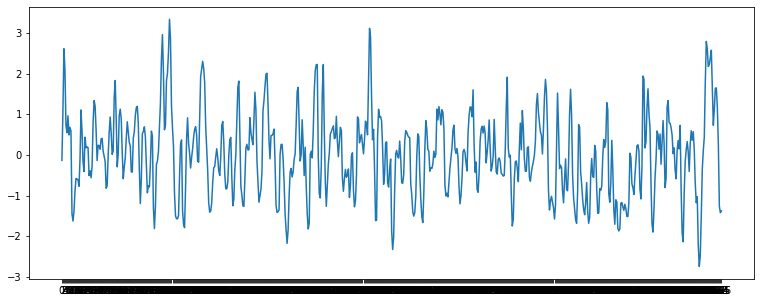

In [10]:
plt.plot(Prova.T)
plt.show()

In [11]:
Prova.values

array([-1.34460628e-01,  1.09144306e+00,  2.61134929e+00,  2.09739159e+00,
        7.35365464e-01,  5.44687278e-01,  9.61243432e-01,  4.89814514e-01,
        6.78479067e-01,  5.83783339e-01, -1.44345925e+00, -1.62698402e+00,
       -1.39049416e+00, -8.94357308e-01, -5.77967761e-01, -5.93624731e-01,
       -6.12536503e-01, -7.72573875e-01, -9.78252206e-02,  1.10691066e+00,
        5.70872443e-01, -1.71819405e-01, -4.10470933e-01,  4.36731706e-01,
        1.72445637e-01,  1.98860923e-01,  1.75998354e-01, -5.08534336e-01,
       -3.89227126e-01, -5.60784075e-01, -2.82609801e-01,  7.86084993e-01,
        1.33513500e+00,  1.20805586e+00,  6.10124237e-01, -1.39734131e-01,
        2.37669698e-01,  2.27560276e-01,  1.39774754e-01,  3.95290300e-01,
        4.06187112e-01,  9.30671292e-02, -4.15101863e-02, -1.63101133e-01,
       -8.19249513e-01, -7.55268508e-01, -8.37515686e-03,  5.43455216e-01,
        9.33239317e-01,  5.39054989e-01,  1.52805897e-02,  9.85515537e-02,
        1.41823986e+00,  

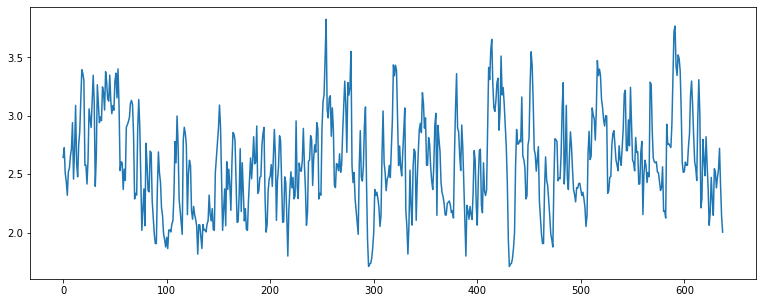

In [12]:
w = 20
mp12, mpi12= matrixProfile.stomp(Prova.values, w)

plt.plot(mp12)
plt.show()

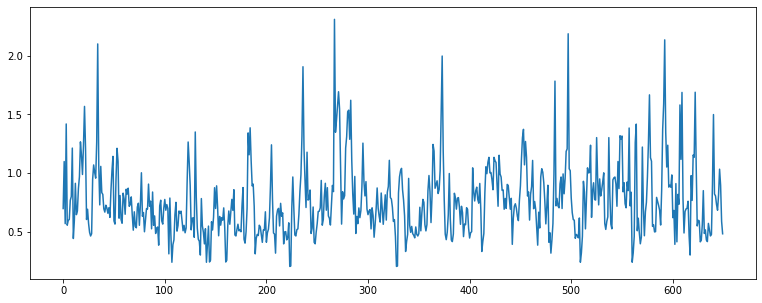

In [13]:
w = 8
mp8, mpi8 = matrixProfile.stomp(Prova.values, w)

plt.plot(mp8)
plt.show()

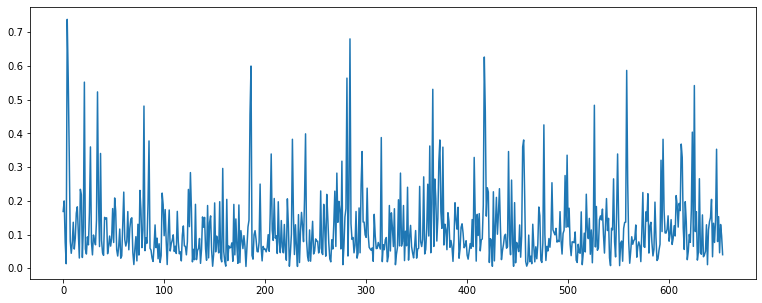

In [14]:
w = 4
mp4, mpi4 = matrixProfile.stomp(Prova.values, w)

plt.plot(mp4)
plt.show()

In [15]:
mo12, mod12  = motifs.motifs(Prova.values, (mp12, mpi12), max_motifs=4,radius=1)

In [16]:
motifs.motifs

<function matrixprofile.motifs.motifs(ts, mp, max_motifs=3, radius=2, n_neighbors=None, ex_zone=None)>

In [17]:
mo12

[[295, 431], [217, 389], [130, 333]]

In [18]:
mod12

[1.7096338074913942, 1.7985020079025642, 1.8152307035224335]

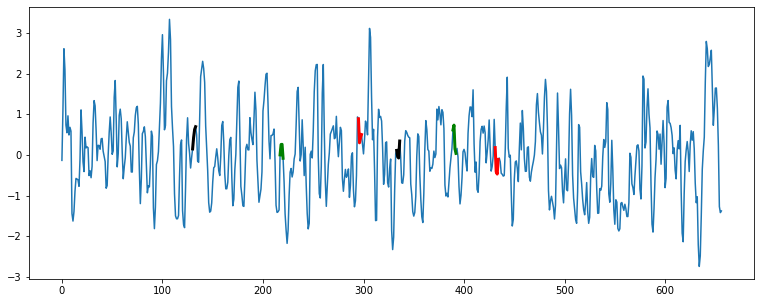

In [19]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo12)]
for m, d, c in zip(mo12, mod12, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [20]:
mo8, mod8  = motifs.motifs(Prova.values, (mp8, mpi8), max_motifs=5)

In [21]:
mo8

[[223, 328], [107, 141, 306, 628], [509, 560], [135, 617]]

In [22]:
mod8

[0.20699600436964705,
 0.242543902355949,
 0.24300784114581322,
 0.3038785723874225]

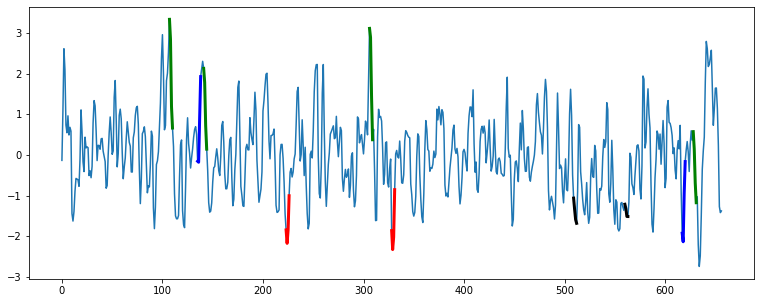

In [23]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo8)]
for m, d, c in zip(mo8, mod8, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [24]:
mo4, mod4  = motifs.motifs(Prova.values, (mp4, mpi4), max_motifs=5)

In [25]:
mo4

[[181, 232], [425, 446], [148, 224], [161, 459], [542, 551]]

In [26]:
mod4

[0.005259224534071438,
 0.005686888406150111,
 0.005838212883145507,
 0.006147643764585286,
 0.007742948695686317]

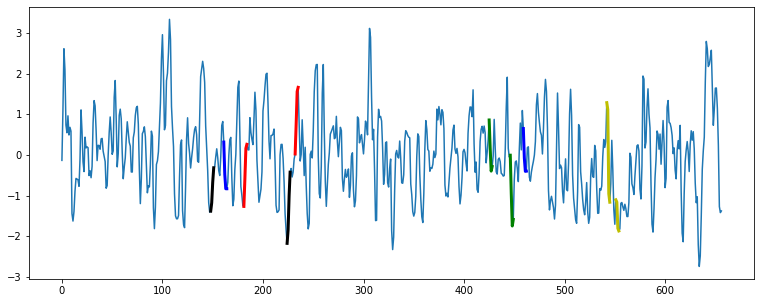

In [27]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo4)]
for m, d, c in zip(mo4, mod4, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [28]:
anoms12 = discords(mp12, ex_zone=3, k=5)

In [29]:
anoms12

array([254, 591, 414, 278, 452])

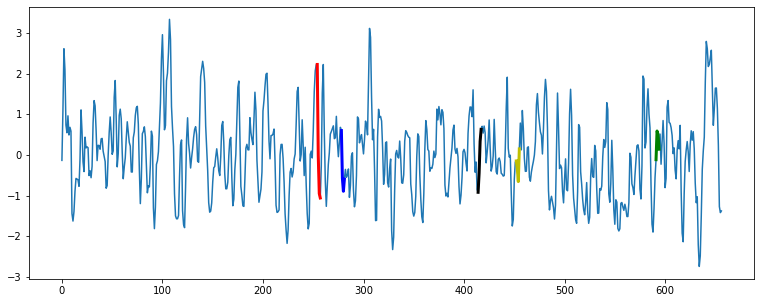

In [30]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms12)]
for a, c in zip(anoms12, colors):
    a_shape = Prova.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [31]:
anoms8 = discords(mp8, ex_zone=3, k=5)

In [32]:
anoms8

array([267, 497, 592,  34, 373])

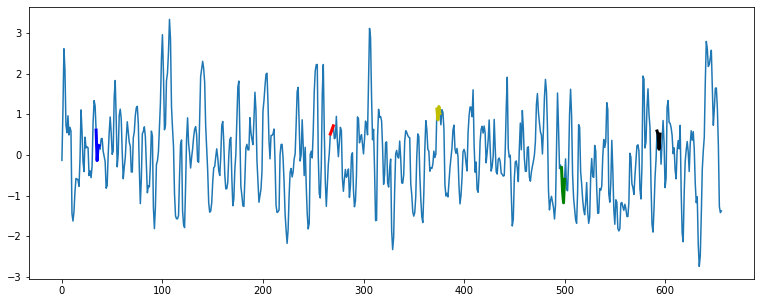

In [33]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms8)]
for a, c in zip(anoms8, colors):
    a_shape = Prova.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [34]:
Prova2=df.iloc[1]

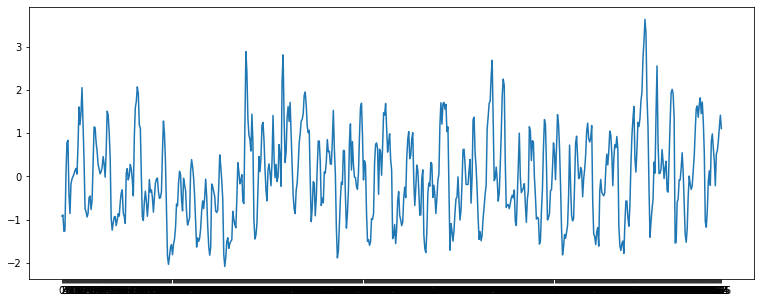

In [35]:
plt.plot(Prova2.T)
plt.show()

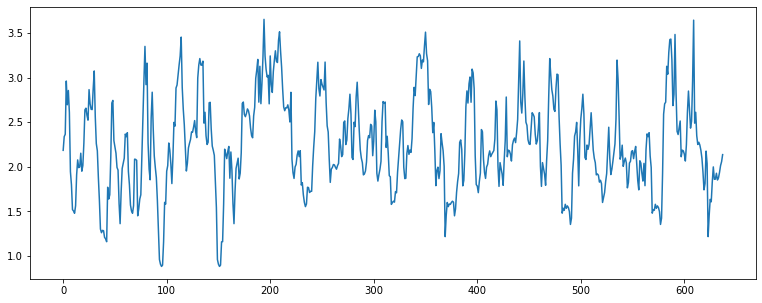

In [36]:
w = 20
mp12, mpi12= matrixProfile.stomp(Prova2.values, w)

plt.plot(mp12)
plt.show()

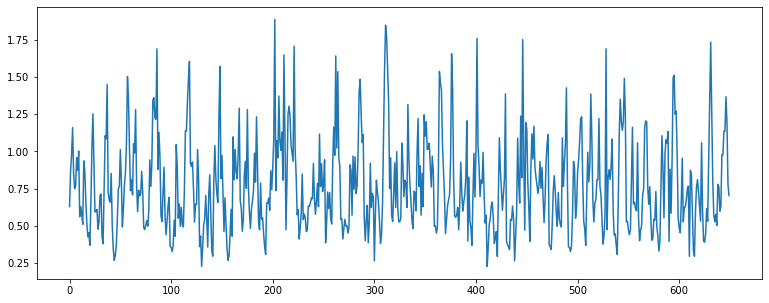

In [37]:
w = 8
mp8, mpi8 = matrixProfile.stomp(Prova2.values, w)

plt.plot(mp8)
plt.show()

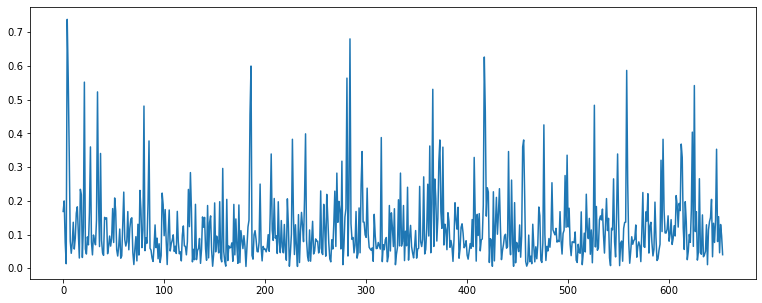

In [38]:
w = 4
mp4_2, mpi4_2 = matrixProfile.stomp(Prova2.values, w)

plt.plot(mp4)
plt.show()

In [39]:
mo12, mod12  = motifs.motifs(Prova2.values, (mp12, mpi12), max_motifs=5,radius=1)

In [40]:
mo12

[[95, 151], [369, 623], [490, 577], [55, 165]]

In [41]:
mod12

[0.8824481994702371, 1.216941689010543, 1.3538348486541072, 1.3624862657770138]

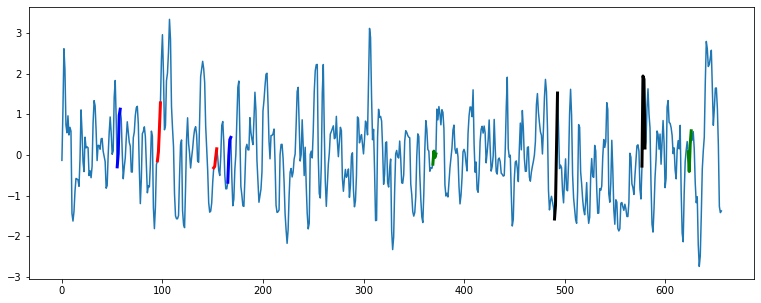

In [42]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo12)]
for m, d, c in zip(mo12, mod12, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [43]:
mo8, mod8  = motifs.motifs(Prova2.values, (mp8, mpi8), max_motifs=5)

In [44]:
mo8

[[101, 130, 411],
 [300, 438, 525],
 [44, 156, 492],
 [234, 274, 421, 610],
 [18, 141, 268, 615]]

In [45]:
mod8

[0.22536100979999743,
 0.2623668401626891,
 0.2663942207266522,
 0.29318741643232327,
 0.2942368688845655]

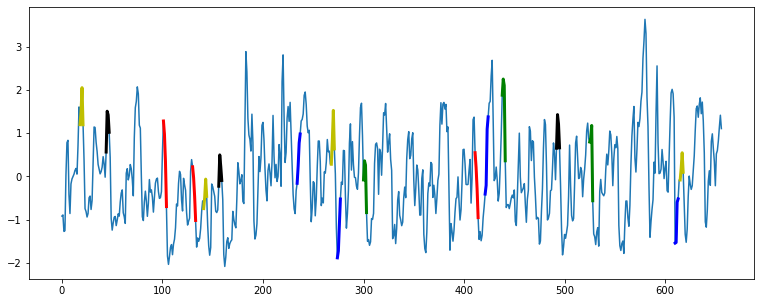

In [46]:
plt.plot(Prova2.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo8)]
for m, d, c in zip(mo8, mod8, colors):
    for i in m:
        m_shape = Prova2.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [47]:
mo4_2, mod4_2  = motifs.motifs(Prova.values, (mp4_2, mpi4_2), max_motifs=5)

In [48]:
mo4_2

[[604, 629], [24, 28], [302, 440], [305, 337], [404, 567]]

In [49]:
mod4_2

[0.00468702382947823,
 0.009219089074189618,
 0.011320450800590538,
 0.011769469377964626,
 0.012020328120677125]

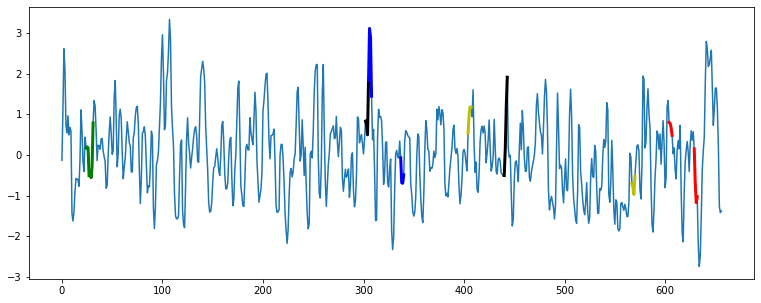

In [50]:
plt.plot(Prova.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo4_2)]
for m, d, c in zip(mo4_2, mod4_2, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [51]:
dist = dtw(Prova[181:185],Prova2[604:608])
dist

3.295442503004923

In [52]:
Prova[181:185]

181   -1.266840
182   -0.593279
183    0.163557
184    0.260393
Name: 2, dtype: float64

In [53]:
lista=[]
for i in range(0,5,1):
    lista2=[]
    for j in range(0,5,1):
        dist=dtw(Prova[mo4_2[i][0]],Prova2[mo4_2[j][0]])
        print(dist)
        lista2.append(dist)
        print(lista2)

    lista.append(lista2)
    

0.3631323633823741
[0.3631323633823741]
1.6095976884609136
[0.3631323633823741, 1.6095976884609136]
0.5355386171586749
[0.3631323633823741, 1.6095976884609136, 0.5355386171586749]
2.2590936603674536
[0.3631323633823741, 1.6095976884609136, 0.5355386171586749, 2.2590936603674536]
0.9798234206161418
[0.3631323633823741, 1.6095976884609136, 0.5355386171586749, 2.2590936603674536, 0.9798234206161418]
0.26341591199066205
[0.26341591199066205]
0.9830494130878775
[0.26341591199066205, 0.9830494130878775]
0.09100965821436124
[0.26341591199066205, 0.9830494130878775, 0.09100965821436124]
1.6325453849944176
[0.26341591199066205, 0.9830494130878775, 0.09100965821436124, 1.6325453849944176]
0.3532751452431057
[0.26341591199066205, 0.9830494130878775, 0.09100965821436124, 1.6325453849944176, 0.3532751452431057]
0.3957240068196787
[0.3957240068196787]
1.6421893318982184
[0.3957240068196787, 1.6421893318982184]
0.5681302605959795
[0.3957240068196787, 1.6421893318982184, 0.5681302605959795]
2.29168530

In [54]:
lista

[[0.3631323633823741,
  1.6095976884609136,
  0.5355386171586749,
  2.2590936603674536,
  0.9798234206161418],
 [0.26341591199066205,
  0.9830494130878775,
  0.09100965821436124,
  1.6325453849944176,
  0.3532751452431057],
 [0.3957240068196787,
  1.6421893318982184,
  0.5681302605959795,
  2.2916853038047584,
  1.0124150640534464],
 [1.3999848977662448,
  2.646450222844784,
  1.5723911515425457,
  3.295946194751324,
  2.0166759550000126],
 [0.09722070435646557,
  1.343686029435005,
  0.2696269581327664,
  1.993182001341545,
  0.7139117615902333]]

In [55]:
for i in range(0,5,1):
    for j in range(0,5,1):
        if(lista[i][j] < 0.1):
            print(i,j)
            print(lista[i][j])



1 2
0.09100965821436124
4 0
0.09722070435646557


In [56]:
mo4

[[181, 232], [425, 446], [148, 224], [161, 459], [542, 551]]

In [57]:
mo4_2

[[604, 629], [24, 28], [302, 440], [305, 337], [404, 567]]

In [58]:
aaa=[[425, 446]]

In [59]:
aaa2=[[302, 440]]

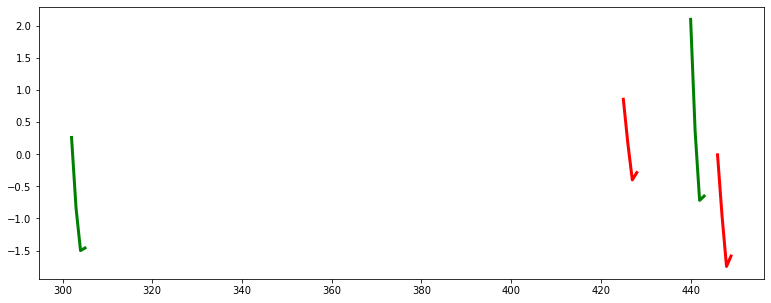

In [60]:


colors = ['r', 'g', 'k', 'b', 'y'][:len(aaa)]
for m, d, c in zip(aaa, mod4_2, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        
colors = ['g', 'g', 'k', 'b', 'y'][:len(aaa)]

for m, d, c in zip(aaa2, mod4_2, colors):
    for i in m:
        m_shape = Prova2.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [61]:
aaa=[[542, 551]]

In [62]:
aaa2=[[604, 629]]

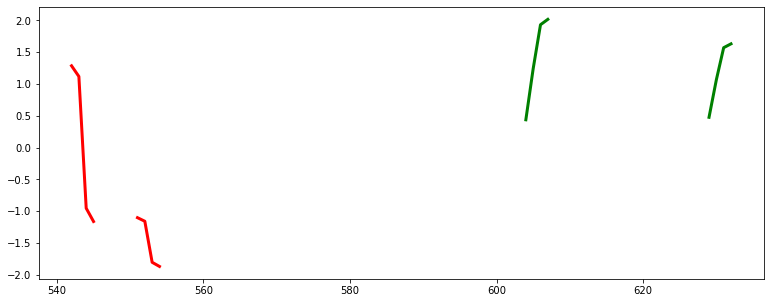

In [63]:


colors = ['r', 'g', 'k', 'b', 'y'][:len(aaa)]
for m, d, c in zip(aaa, mod4_2, colors):
    for i in m:
        m_shape = Prova.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
        
colors = ['g', 'g', 'k', 'b', 'y'][:len(aaa)]

for m, d, c in zip(aaa2, mod4_2, colors):
    for i in m:
        m_shape = Prova2.values[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

In [85]:
anoms12 = discords(mp12, ex_zone=100, k=5)

In [86]:
anoms12

array([194, 609, 350,  79, 470])

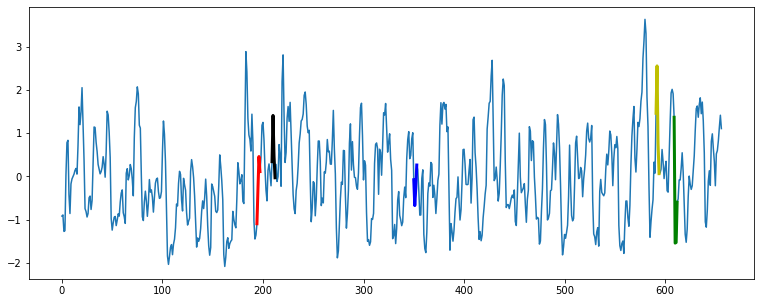

In [66]:
plt.plot(Prova2.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms12)]
for a, c in zip(anoms12, colors):
    a_shape = Prova2.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [101]:
anoms8 = discords(mp8, ex_zone=10, k=20)

In [102]:
discords

<function matrixprofile.discords.discords(mp, ex_zone, k=3)>

In [103]:
anoms8

array([202, 311, 401, 446, 631, 221, 528,  86, 376, 262, 118, 148, 364,
       595,  57, 546, 286,  37, 489, 429])

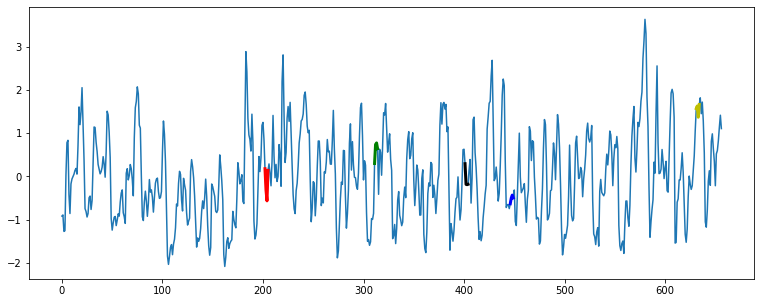

In [70]:
plt.plot(Prova2.values)
colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms8)]
for a, c in zip(anoms8, colors):
    a_shape = Prova2.values[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

In [71]:

df.iloc[anoms8]

,0,1,2,3,4,5,6,7,8,9,...,647,648,649,650,651,652,653,654,655,656
track_id,,,,,,,,,,,,,,,,,,,,,
10696,-0.346466,0.012043,0.051220,-0.029645,-0.450065,-1.670569,-2.574257,-2.123525,-1.473566,-1.303623,...,-1.486725,-1.490362,-0.748467,-0.728208,-0.509158,-1.522846,-1.634195,-0.752620,0.014080,0.043351
13768,-0.907789,-0.906245,-1.449471,-1.987551,-1.357939,-1.431129,-0.888582,-0.707988,1.132355,0.654616,...,1.153198,0.659456,0.677209,0.917315,1.026222,0.873081,0.079846,-0.435157,-0.883671,-0.972865
20667,0.631835,-0.062923,-0.959480,1.024669,0.772318,0.843104,1.072313,0.908570,1.111604,-0.441446,...,-0.183652,1.299208,1.327356,0.274315,-0.755174,-0.058996,-0.884656,-1.961047,-2.277421,-2.615268
24427,-1.125007,-1.130360,-0.667751,-0.030155,0.372770,-0.397640,0.289836,1.535594,-0.179803,-0.580366,...,-0.281070,-0.313522,-0.715210,-0.704655,-0.970144,-1.294362,-1.264860,-0.915392,-0.826204,-0.510038
33459,0.634007,0.837089,1.077850,-0.008096,-0.654949,-0.785749,-1.176332,-0.849890,-0.114869,0.059226,...,0.615080,0.507180,0.643767,0.755097,0.094106,-0.347371,-0.375178,0.017094,0.422215,1.076329
